### Clean Scrubbing file for language task

- Build a scrubbing file to be used on subtype analysis for language task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed

In [2]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
%matplotlib inline

In [4]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head()

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883


In [5]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("langRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL['ID'] = scrub_select_RL[' '].str.strip('_sess2_langRL ')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("langLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR['ID'] = scrub_select_LR[' '].str.strip('_sess2_langLR ')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456,HCP100206
20,HCP100307_sess2_langRL,0.0,316.0,0.101970,0.101970,HCP100307
34,HCP100408_sess2_langRL,0.0,316.0,0.128052,0.128052,HCP100408
48,HCP100610_sess2_langRL,0.0,316.0,0.189474,0.189474,HCP100610
62,HCP101006_sess2_langRL,0.0,316.0,0.156877,0.156877,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963,HCP100206
21,HCP100307_sess2_langLR,0.0,316.0,0.119331,0.119331,HCP100307
35,HCP100408_sess2_langLR,0.0,316.0,0.140232,0.140232,HCP100408
49,HCP100610_sess2_langLR,0.0,316.0,0.179002,0.179002,HCP100610
63,HCP101006_sess2_langLR,0.0,316.0,0.131924,0.131924,HCP101006


In [6]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
6,HCP100206_sess2_langRL,0.088456,0.088456,HCP100206
20,HCP100307_sess2_langRL,0.101970,0.101970,HCP100307
34,HCP100408_sess2_langRL,0.128052,0.128052,HCP100408
48,HCP100610_sess2_langRL,0.189474,0.189474,HCP100610
62,HCP101006_sess2_langRL,0.156877,0.156877,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
7,HCP100206_sess2_langLR,0.099963,0.099963,HCP100206
21,HCP100307_sess2_langLR,0.119331,0.119331,HCP100307
35,HCP100408_sess2_langLR,0.140232,0.140232,HCP100408
49,HCP100610_sess2_langLR,0.179002,0.179002,HCP100610
63,HCP101006_sess2_langLR,0.131924,0.131924,HCP101006


In [7]:
# Merge the tow table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID'.strip('_sess2_langRL'), how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID'.strip('_sess2_langRL'), how='right')



In [8]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess2_langRL,0.088456,0.088456,HCP100206,HCP100206_sess2_langLR,0.099963,0.099963
1,HCP100307_sess2_langRL,0.101970,0.101970,HCP100307,HCP100307_sess2_langLR,0.119331,0.119331
2,HCP100408_sess2_langRL,0.128052,0.128052,HCP100408,HCP100408_sess2_langLR,0.140232,0.140232
3,HCP100610_sess2_langRL,0.189474,0.189474,HCP100610,HCP100610_sess2_langLR,0.179002,0.179002
4,HCP101006_sess2_langRL,0.156877,0.156877,HCP101006,HCP101006_sess2_langLR,0.131924,0.131924


In [9]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [10]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.088456,0.088456,0.099963,0.099963
1,HCP100307,0.101970,0.101970,0.119331,0.119331
2,HCP100408,0.128052,0.128052,0.140232,0.140232
3,HCP100610,0.189474,0.189474,0.179002,0.179002
4,HCP101006,0.156877,0.156877,0.131924,0.131924


In [11]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset['FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset['FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)
# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_language.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
# Show final table
merged_scrub_RL_LR_subset.tail()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
828,HCP992673,0.194723,0.126714,0.120183,0.116500,0.121607,0.157453
829,HCP992774,0.107888,0.107888,0.094298,0.094298,0.101093,0.101093
830,HCP993675,0.122257,0.122257,0.122313,0.122313,0.122285,0.122285
831,HCP994273,0.091318,0.091318,0.098940,0.086720,0.089019,0.095129
832,HCP99678,0.164816,0.151918,0.164841,0.164841,0.158380,0.164829


In [20]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,833.000000,833.000000,831.000000,831.000000,833.000000,833.000000
mean,0.144986,0.134209,0.145325,0.134864,0.134606,0.145212
std,0.052021,0.036417,0.049982,0.037680,0.036050,0.048137
min,0.057141,0.057141,0.062068,0.062068,0.060294,0.060294
25%,0.111627,0.108277,0.110393,0.106676,0.108889,0.111614
50%,0.133671,0.128714,0.135645,0.128850,0.128922,0.135504
75%,0.166221,0.154526,0.166712,0.156012,0.153972,0.167956
max,0.473389,0.287642,0.436617,0.310674,0.295814,0.381997


In [21]:
#replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan)

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.088456,0.088456,0.099963,0.099963,0.094210,0.094210
1,HCP100307,0.101970,0.101970,0.119331,0.119331,0.110650,0.110650
2,HCP100408,0.128052,0.128052,0.140232,0.140232,0.134142,0.134142
3,HCP100610,0.189474,0.189474,0.179002,0.179002,0.184238,0.184238
4,HCP101006,0.156877,0.156877,0.131924,0.131924,0.144401,0.144401
5,HCP101107,0.224189,0.131822,0.325583,0.119171,0.125496,0.274886
6,HCP101309,0.074865,0.074865,0.089064,0.089064,0.081964,0.081964
7,HCP101410,0.126619,0.126619,0.133569,0.133569,0.130094,0.130094
8,HCP101915,0.093385,0.093385,0.097605,0.097605,0.095495,0.095495
9,HCP102008,0.162509,0.162362,0.171901,0.169665,0.166013,0.167205


In [13]:
# look if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


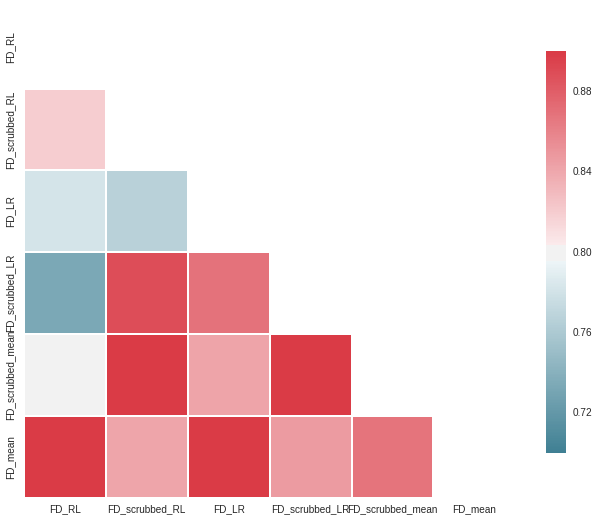

In [14]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


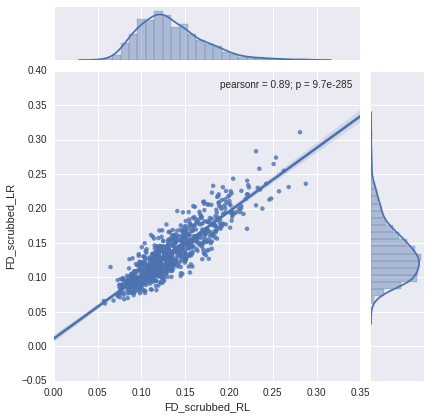

In [15]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


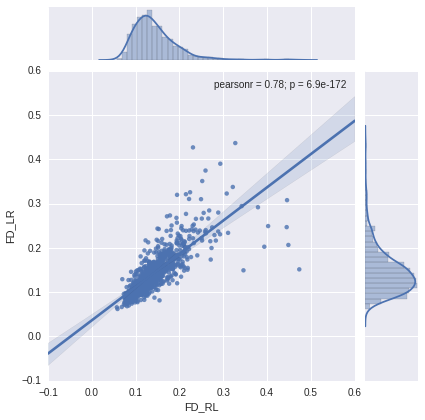

In [16]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

In [17]:
sum(merged_scrub_RL_LR_subset.isnull())

TypeError: unsupported operand type(s) for +: 'int' and 'str'